# Measure "cleanliness" of insect signal datasets

In [114]:
%reset -f

import pandas as pd
import numpy as np
from wavhandler import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


### Loading one dataset

In [115]:
dname = 'Pcfruit'
d_psd = Dataset(dname)
print("Dataset classes: {}\n".format(d_psd.target_classes))
d_psd.read(setting='psd_dB', data='D. suzukii')

Dataset classes: ['C. pomonella', 'D. suzukii']

Read filenames in 0.03 seconds.
Loaded data into matrix in 1.57 seconds.


In [116]:
d_raw = Dataset(dname)
print("Dataset classes: {}\n".format(d_raw.target_classes))
d_raw.read(setting='read', data='D. suzukii')

df_raw = d_raw.X.copy()

Dataset classes: ['C. pomonella', 'D. suzukii']

Read filenames in 0.03 seconds.
Loaded data into matrix in 0.88 seconds.


#### Loading the raw signals

## Examples of clean/noisy signals

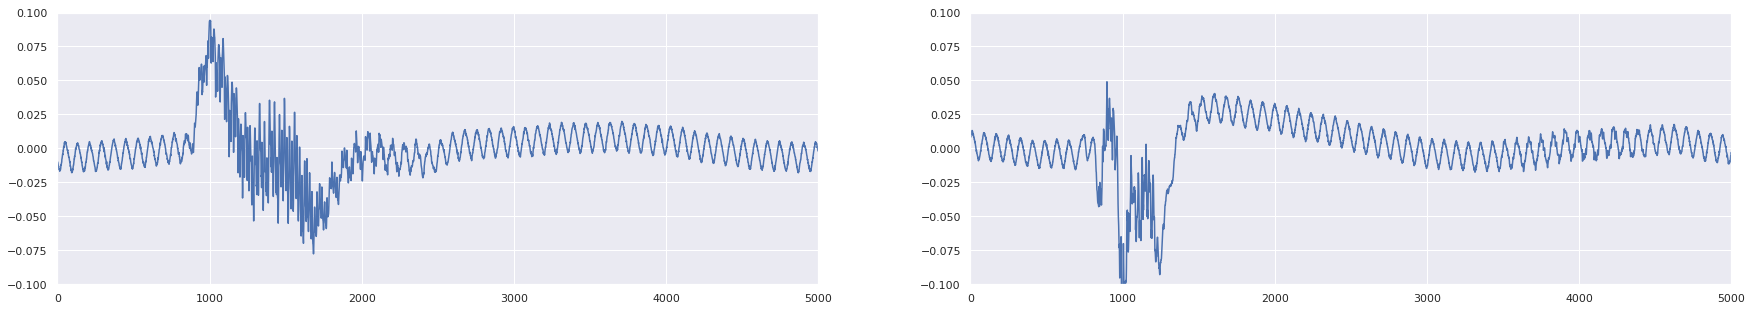

In [117]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1); d_raw.X.iloc[2,:].plot(ylim=(-.1,.1))
plt.subplot(1,2,2); d_raw.X.iloc[49,:].plot(ylim=(-.1,.1)) #5817 or 5 or 1310 or 49

### Examples of clean/unclean PSDs

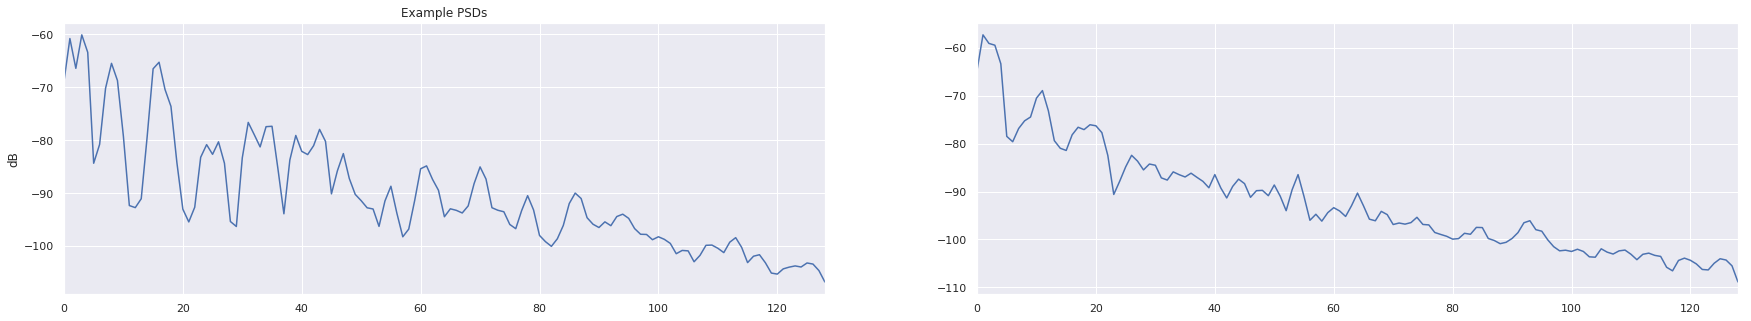

In [118]:
df = d_psd.X.copy()

plt.figure(figsize=(30,5))
plt.subplot(1,2,1); plt.title('Example PSDs'); d_psd.X.iloc[2,:].plot(); plt.ylabel('dB')
plt.subplot(1,2,2); d_psd.X.iloc[49,:].plot() #5817 or 5

### Calculating a feature upon which to clean data (e.g. var(PSD) or std(PSD) )

In [119]:
df['feat'] = d_psd.X.apply(lambda x: x.var(), axis=1)
df['feat'].sort_values(ascending=False).head()

3464    185.228605
5806    183.326439
2766    182.802223
2259    182.696248
4319    178.449554
Name: feat, dtype: float64

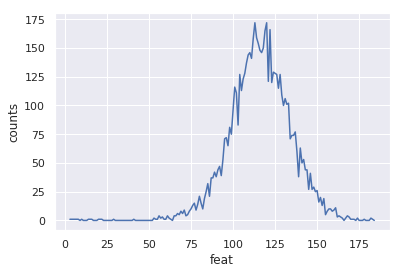

In [120]:
sub = pd.DataFrame()
sub['feat'] = df['feat']
np_hist(sub, 'feat', res=1)

## Selecting feat values above a high quantile as "clean"

In [121]:
clean = df[df['feat'] > df['feat'].quantile(0.95)].iloc[:,:-1]
clean_raw = df_raw.loc[clean.index]
print(clean.shape, clean_raw.shape)

(322, 129) (322, 5000)


In [122]:
df['feat'].quantile(0.95)

145.3819943534955

In [123]:
noisy = df[df['feat'] <= df['feat'].quantile(0.05)].iloc[:,:-1]
noisy_raw = df_raw.loc[noisy.index]
print(noisy.shape, noisy_raw.shape)

(322, 129) (322, 5000)


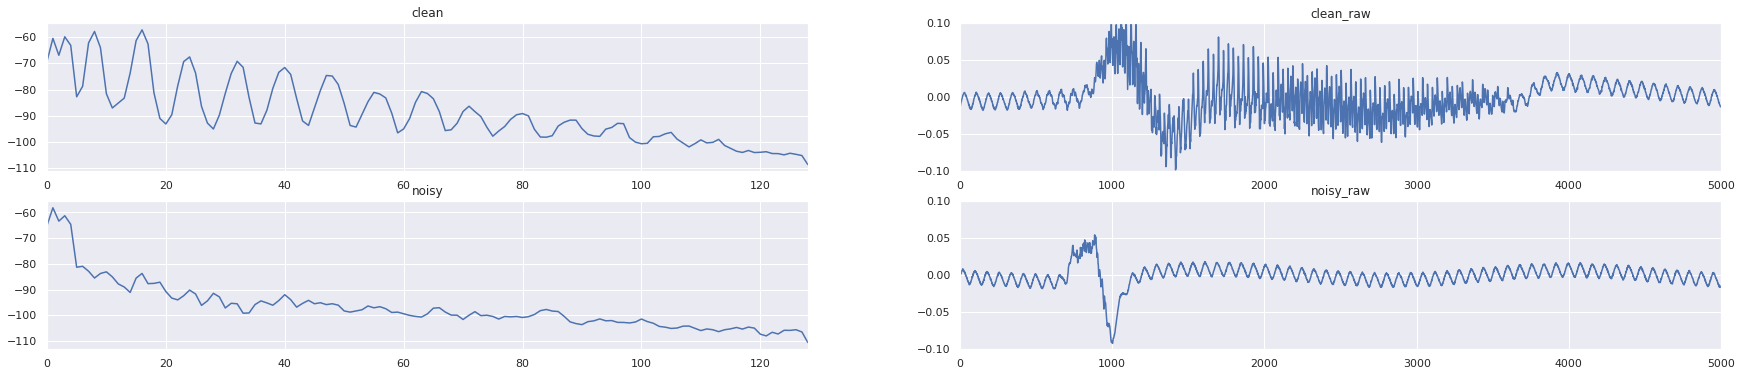

In [134]:
plt.figure(figsize=(30,6))

plt.subplot(2,2,1)
plt.title('clean')
rdm_clean = np.random.randint(0, clean.shape[0])
clean.iloc[rdm_clean,:].plot()#ylim=(-.1,.1))

plt.subplot(2,2,2)
plt.title('clean_raw')
clean_raw.iloc[rdm_clean,:].plot(ylim=(-.1,.1))

plt.subplot(2,2,3)
plt.title('noisy')
rdm_noisy = np.random.randint(0, noisy.shape[0])
plt.title('noisy')
noisy.iloc[rdm_noisy,:].plot()#ylim=(-.1,.1))

plt.subplot(2,2,4)
plt.title('noisy_raw')
noisy_raw.iloc[rdm_noisy,:].plot(ylim=(-.1,.1))

## Checking dataset distributions for selected feature (now variance)

Dataset classes: ['Ae. aegypti', 'Ae. albopictus', 'An. arabiensis', 'An. gambiae', 'C. pipiens', 'C. quinquefasciatus']

Read filenames in 1.21 seconds.
Loaded data into matrix in 10.69 seconds.


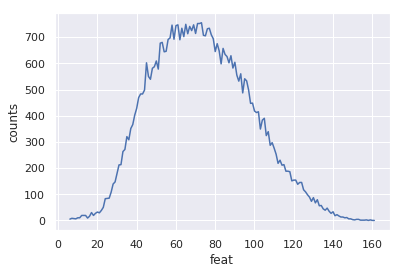

In [136]:
d1 = Dataset('Wingbeats')
print("Dataset classes: {}\n".format(d1.target_classes))

d1.read(setting='psd_dB', data='An. gambiae')
df = d1.X
df['feat'] = d1.X.apply(lambda x: x.var(), axis=1)

np_hist(df,'feat',res=1)
# df['feat'].hist()

Dataset classes: ['C. pomonella', 'D. suzukii']

Read filenames in 0.04 seconds.
Loaded data into matrix in 1.66 seconds.


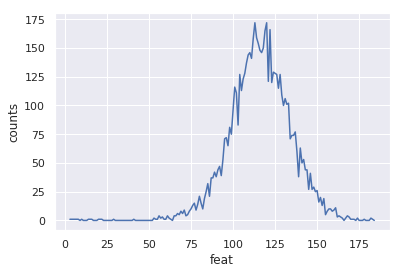

In [137]:
d1 = Dataset('Pcfruit')
print("Dataset classes: {}\n".format(d1.target_classes))

d1.read(setting='psd_dB', data='D. suzukii')
df = d1.X
df['feat'] = d1.X.apply(lambda x: x.var(), axis=1)

np_hist(df,'feat',res=1)
# df['feat'].hist()

Dataset classes: ['Melanogaster', 'Suzukii']

Read filenames in 0.10 seconds.
Loaded data into matrix in 1.82 seconds.


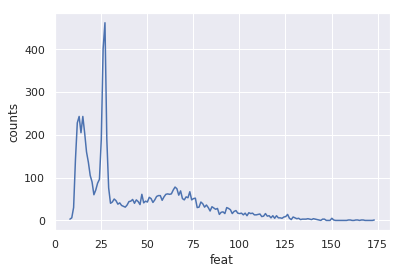

In [138]:
d1 = Dataset('Thomas')
print("Dataset classes: {}\n".format(d1.target_classes))

d1.read(setting='psd_dB', data='Melanogaster')
df = d1.X
df['feat'] = d1.X.apply(lambda x: x.var(), axis=1)

np_hist(df,'feat',res=1)
# df['feat'].hist()

#### Examining the second peak

In [139]:
inds = df[(df['feat']>25) & (df['feat']<30)].index.values
d1.get_sensor_features()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9b2428898>,
      dtype=object)

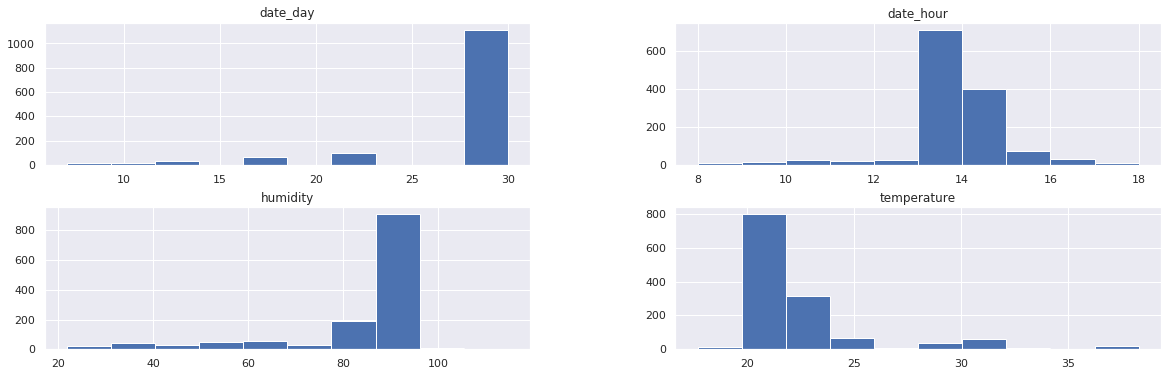

In [140]:
d1.df_features.loc[inds].hist(figsize=(20,6))

#### Raw signal vs Difference series

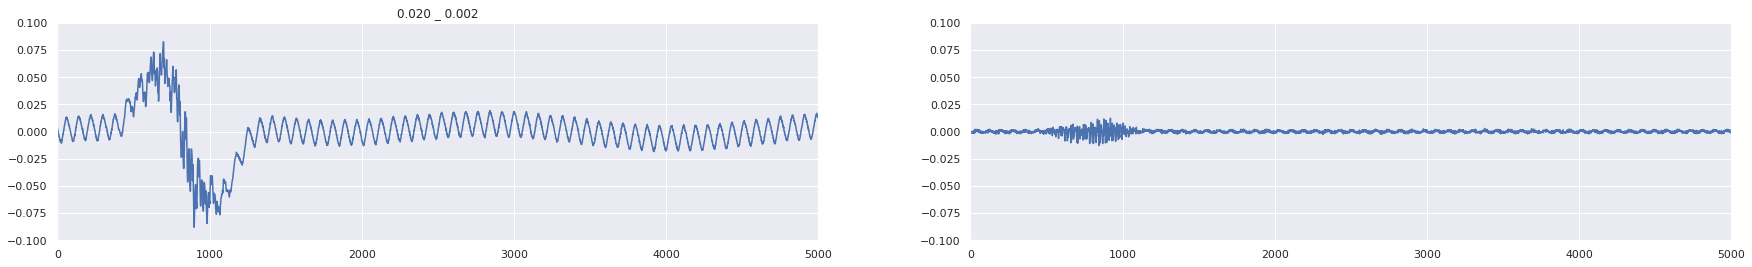

In [142]:
rdm = np.random.randint(0,df_raw.shape[0])
sig = df_raw.iloc[rdm,:]
plt.figure(figsize=(30,4))
plt.subplot(1,2,1); sig.plot(ylim=(-.1,.1))
plt.title("{:.3f} _ {:.3f}".format(sig.std(), sig.diff().std()))
plt.subplot(1,2,2); sig.diff().plot(ylim=(-.1,.1))

In [143]:
# # dataset.overview()
# df = dataset.X
# sub = pd.DataFrame()
# sub['diff_std'] = df.apply(lambda x: x.diff().std(), axis=1)
# sub['max'] = dataset.X.max(axis=1)
# sub['min'] = dataset.X.min(axis=1)
# sub.head()

# New Sensor by Insectronics (Potamitis)

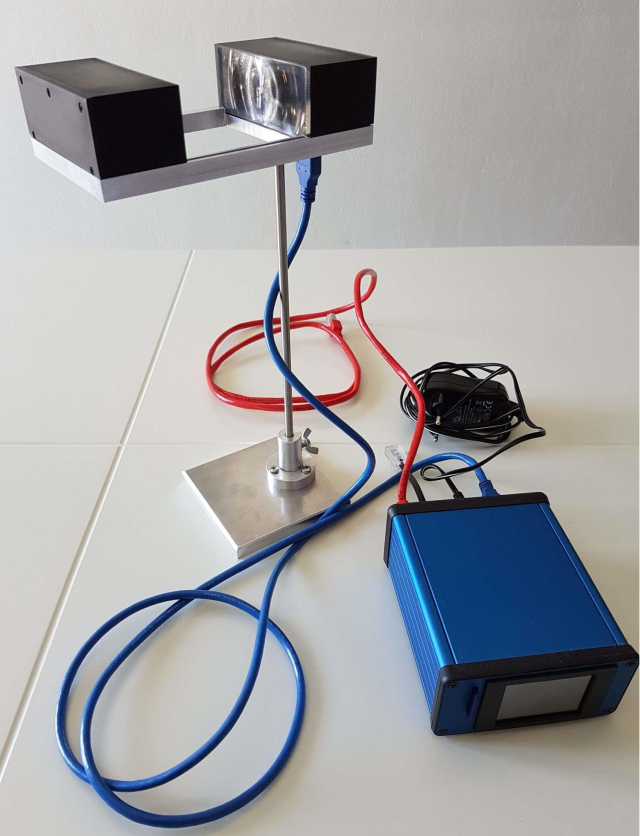

In [98]:
from IPython.display import Image
PATH = "./temp_data/new_sensor.png"
Image(filename = PATH, width=300, height=50)

Read filenames in 0.00 seconds.
Loaded data into matrix in 0.01 seconds.


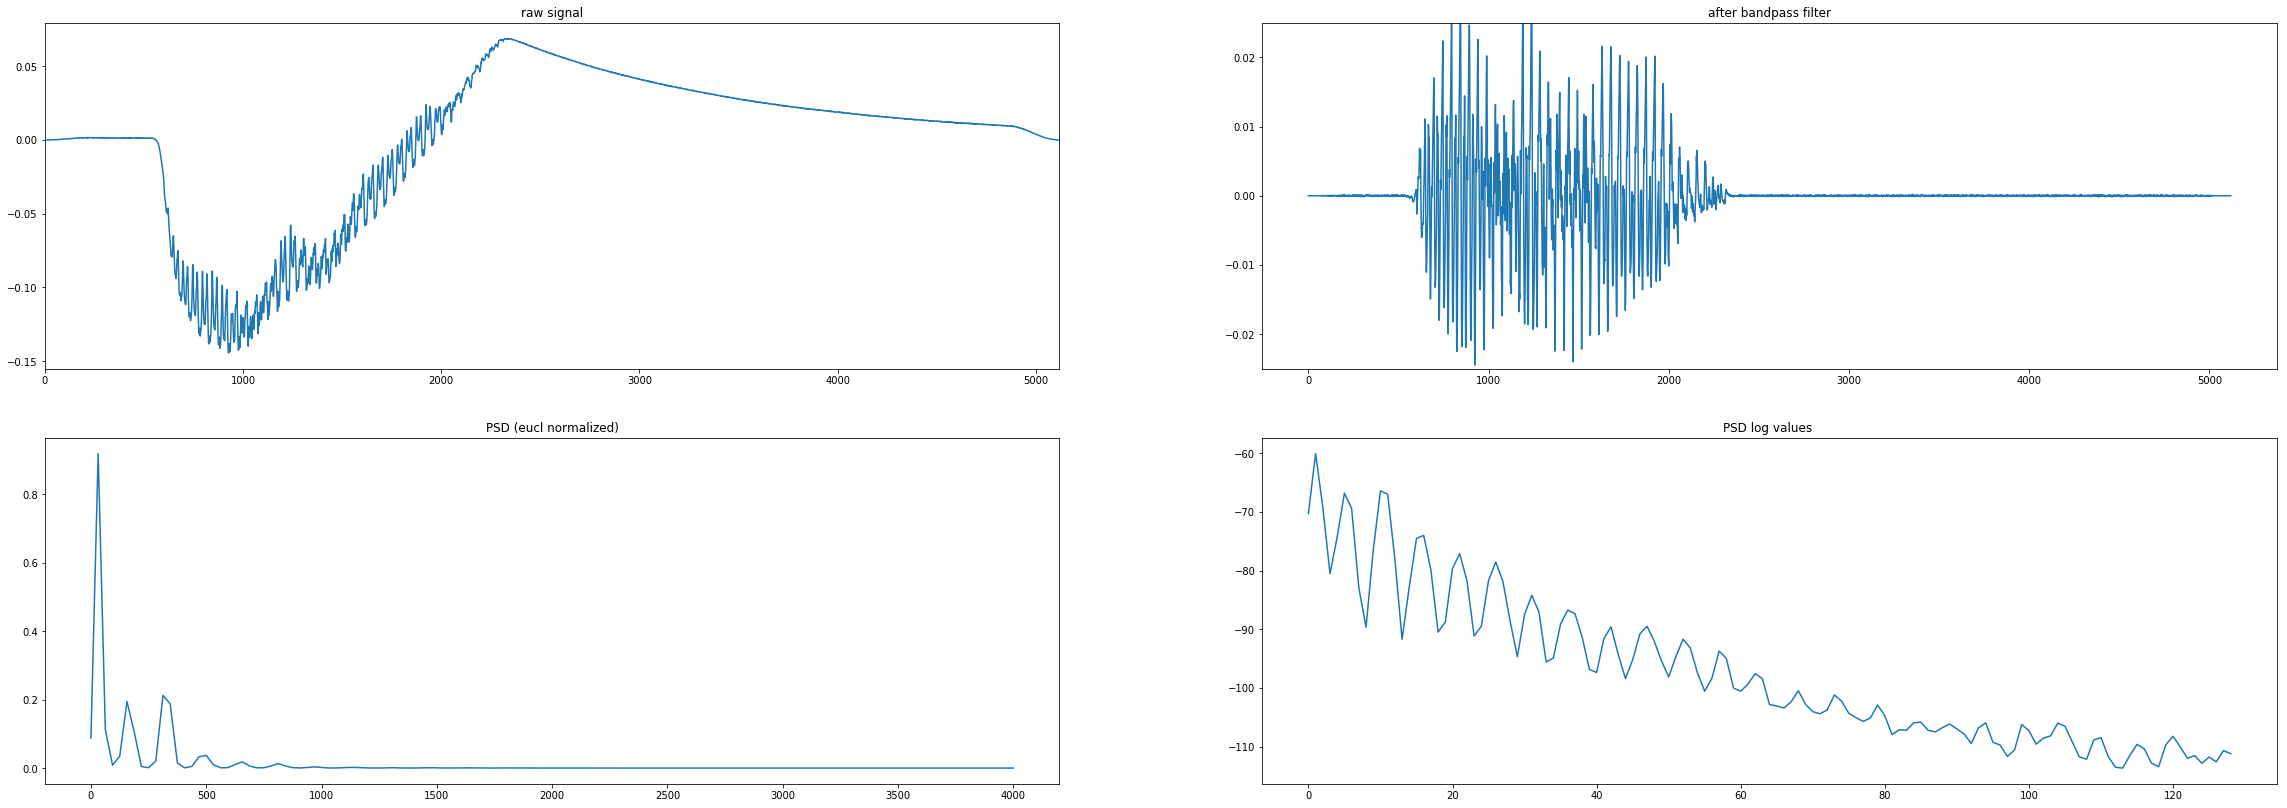

In [113]:
dataset = Dataset('new_sensor')
dataset.read(setting='read', data='D190502153507')

df = dataset.X

rdm = np.random.randint(0,df.shape[0])
plt.figure(figsize=(40,14))
plt.subplot(2,2,1); plt.title('raw signal');
sig = df.iloc[rdm,:]
sig.plot()
plt.subplot(2,2,2); plt.title('after bandpass filter');
plt.ylim(-.025,.025)
plt.plot(butter_bandpass_filter(sig, L_CUTOFF,H_CUTOFF,F_S,B_ORDER))
plt.subplot(2,2,3); plt.title('PSD (eucl normalized)')
f = power_spectral_density(sig)
plt.plot(f.frequency, f.pow_amp)
plt.subplot(2,2,4); plt.title('PSD log values ')
plt.plot(transform_data(sig.values))

Read filenames in 0.13 seconds.
Loaded data into matrix in 2.04 seconds.
5817


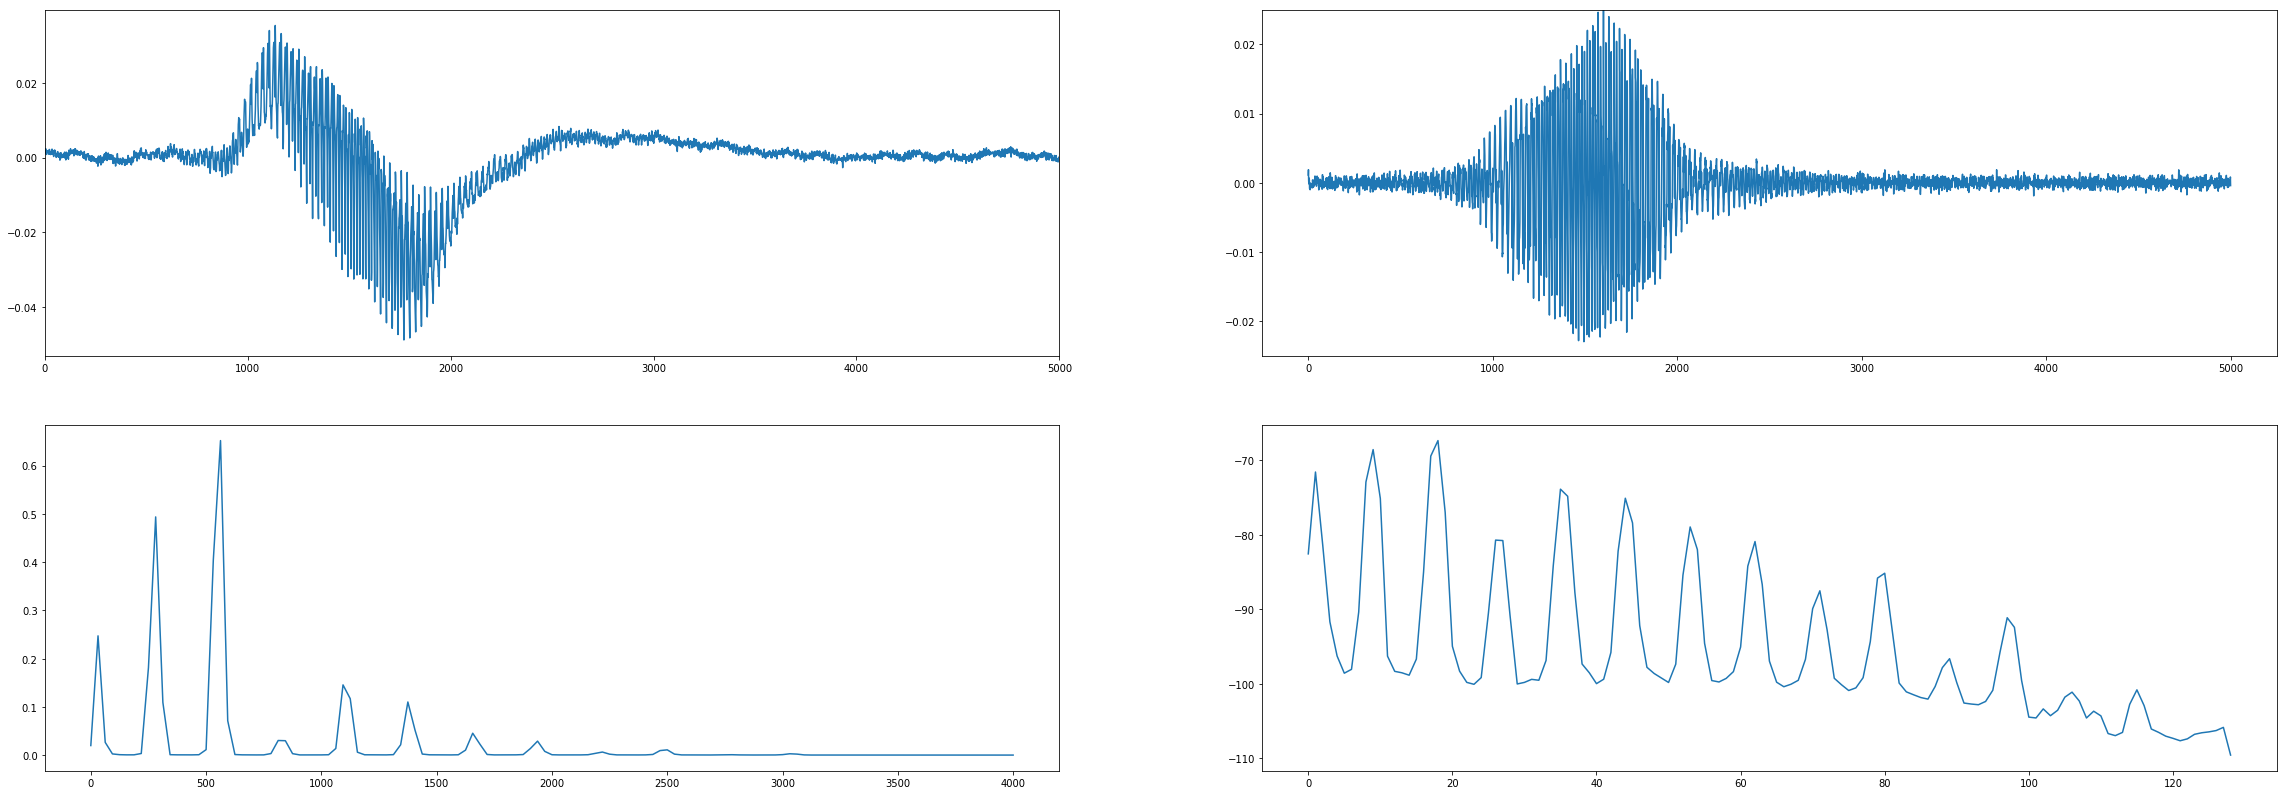

In [111]:
dataset2 = Dataset('Thomas')
dataset2.read(setting='read', data='Suzukii')

df2 = dataset2.X
rdm = 5817#np.random.randint(0,df2.shape[0])
print(rdm)
plt.figure(figsize=(40,14))
plt.subplot(2,2,1)
sig = df2.iloc[rdm,:]
sig.plot()
plt.subplot(2,2,2)
plt.ylim(-0.025,.025)
plt.plot(butter_bandpass_filter(sig, L_CUTOFF,H_CUTOFF,F_S,B_ORDER))
plt.subplot(2,2,3)
f = power_spectral_density(sig)
plt.plot(f.frequency, f.pow_amp)
plt.subplot(2,2,4)
plt.plot(transform_data(sig.values))

In [11]:
# inds = (sub['diff_std'] > 0.003).astype(int).values
# df = df.iloc[inds,:]
# y = dataset.y[inds]
# df.iloc[5,:].plot()

## Neural Net trained on Thomas dataset (92.5% test-acc)

In [593]:
from utils_train import make_classification_ml, make_classification_conv1d

data = Dataset('thomas')
data.read(setting='psd', labels='nr')
make_classification_conv1d(data.X, data.y, )

Read filenames in 0.11 seconds.


Instructions for updating:
Colocations handled automatically by placer.


Loaded data into matrix in 7.14 seconds.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Train on 14709 samples, validate on 3678 samples
Epoch 1/100
14709/14709 [==============================] - 13s 887us/step - loss: 0.3537 - acc: 0.8701 - val_loss: 0.3558 - val_acc: 0.8494

Epoch 00001: val_acc improved from -inf to 0.84937, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/test_.h5
Epoch 2/100
14709/14709 [==============================] - 10s 647us/step - loss: 0.2878 - acc: 0.8899 - val_loss: 0.2774 - val_acc: 0.8959

Epoch 00002: val_acc improved from 0.84937 to 0.89587, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/test_.h5
Epoch 3/100
14709/14709 [==============================] - 10s 649us/step - loss: 0.2714 - acc: 0.8954 - val_loss: 0.2622 - val_acc: 0.9010

Epoch 00003: val_acc improved from 0.89587 to 0.90103, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/test_.h5
Epoch 4/100
14709/14709 [==============================] - 10s 653us/step - loss: 0.2651 - acc: 0.8967 - val_loss: 0.3374 -